In [24]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from  nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
data = pd.read_csv('/content/twitter_training.csv')
data=data.rename(columns={'2401':'id','Borderlands':'name','Positive': 'mood','im getting on borderlands and i will murder you all ,':'remarks'})
data.columns

Index(['id', 'name', 'mood', 'remarks'], dtype='object')

In [32]:
clean=[]
for i in data['remarks']:
    clean.append(re.sub(r'[^\w\s]','',str(i)))
stopword = stopwords.words('english')

In [34]:
data['remarks']= clean

In [38]:
sentiment=SentimentIntensityAnalyzer()
score = []
for i in data['remarks']:
  score.append(sentiment.polarity_scores(i))

In [47]:
dat=pd.DataFrame(score)
data.join(dat)

,id,name,mood,remarks,pedicted_scores,neg,neu,pos,compound
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",0.343,0.657,0.000,-0.6908
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",0.370,0.630,0.000,-0.6908
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",0.370,0.630,0.000,-0.6908
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",0.343,0.657,0.000,-0.6908
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",0.370,0.630,0.000,-0.6908
...,...,...,...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,"{'neg': 0.086, 'neu': 0.817, 'pos': 0.097, 'co...",0.086,0.817,0.097,0.0772
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",0.104,0.896,0.000,-0.2960
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",0.091,0.909,0.000,-0.2960
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,"{'neg': 0.074, 'neu': 0.842, 'pos': 0.084, 'co...",0.074,0.842,0.084,0.0772


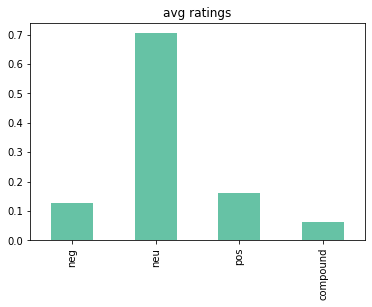

In [78]:
dat.mean().plot(kind='bar', colormap= 'Set2', title='avg ratings')